# Vectors in the 3D Space &mdash; Exercises and Sample Snippets

## Draw the 3D arrow and point representing the coordinates (-1, -2, 2), as well as the dashed box that helps visualizing the vector in 3D.

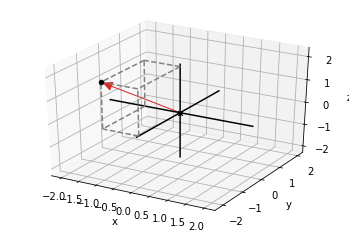

In [5]:
from draw3d import draw3d, Arrow3D, Points3D, Box3D

draw3d(
    Points3D((-1, -2, 2)),
    Arrow3D((-1, -2, 2,)),
    Box3D(-1, -2, 2)
)

## There are exactly 8 3D vectors whose coordinates are all either +1 or -1. For instance, (1, -1, 1) is one of these. Plot all these eight vectors as points, then figure out how to connect them with segments to form the outline of a cube.

Let's start by defining these vectors, and drawing the Points.

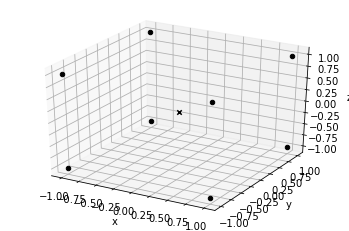

In [10]:
points = [(-1, -1, -1), (-1, -1, 1), (-1, 1, -1), (-1, 1, 1),
          (1, -1, -1),  (1, -1, 1),  (1, 1, -1),  (1, 1, 1)]

draw3d(Points3D(*points), axes=None)

Now, let's draw the Segments that connect them:

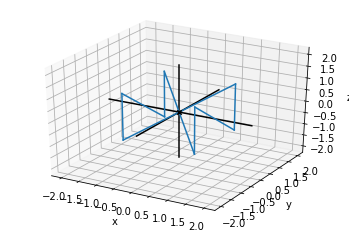

In [12]:
from draw3d import Segment3D

segments = [ Segment3D(points[i], points[(i + 1) % len(points)]) for i in range(0, len(points))]

draw3d(*segments)

In [ ]:
The process seems to be ok, but we need to rearrange them in order to connect them and visualize them.

Let's rearrange them using faces

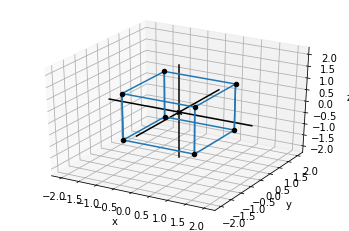

In [23]:
def get_segments_for_face(face_points):
    return [Segment3D(face_points[i], face_points[(i + 1) % len(face_points)]) for i in range(0, len(face_points))]

cube_front_face = [(-1, 1, -1), (-1, 1, 1), (1, 1, 1), (1, 1, -1)]
cube_back_face = [(-1, -1, -1), (-1, -1, 1), (1, -1, 1), (1, -1, -1)]
cube_left_face = [(-1, -1, -1), (-1, 1, -1), (-1, 1, 1), (-1, -1, 1)]
cube_right_face = [(1, -1, -1), (1, 1, -1), (1, 1, 1), (1, -1, 1)]

draw3d(
    *get_segments_for_face(cube_front_face),
    *get_segments_for_face(cube_back_face),
    *get_segments_for_face(cube_left_face),
    *get_segments_for_face(cube_right_face),
    Points3D(*points)
)

Note how the bottom and top faces didn't have to be defined.

Note also that there seems a smarter way to implement the solution.
For example:
+ the vertices can range over the list of possible values [-1, 1]
+ the edges can be grouped into three sets of four that point in each coordinate direction (e.g. there are four edges that go from x=-1 to x=1, while y and z coordinates are the same at both endpoints)

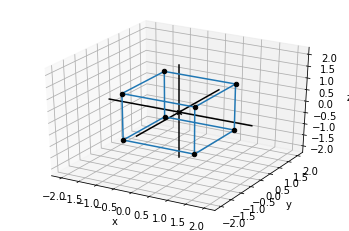

In [30]:
pm1 = [1, -1]
vertices = [(x, y, z) for x in pm1 for y in pm1 for z in pm1]
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +\
    [((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +\
    [((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]

draw3d(
    Points3D(*vertices),
    *[Segment3D(*edge) for edge in edges]
)